# Tutorial for pressure_field()

## Inputs and Outputs

**Function Call (with defaults shown):**

```
pressure_field, directivity, theta = pressure_field(positions,frequencies,
                                                   time = 0.0,
                                                   areas = 0.001,
                                                   velocities = 0.01,
                                                   strengths = 0.01,
                                                   phases = 0,
                                                   x_range = [-1,1],
                                                   y_range = [-1,1],
                                                   z_range = [-1,1],
                                                   point_density = 100,
                                                   directivity_distance = 1000,
                                                   num_directivity_points = 10000,
                                                   method = "Monopole Addition",
                                                   dimensions = 2,
                                                   directivity_only = False,
                                                   directivity_plot_alone = False,
                                                   show_plots = False,
                                                   pressure_limits = [-100,100]):
```

**Inputs:**

* `positions` = array of positions, can be 1-D, 2-D, or 3-D point locations. Used to specify source positions.
* `frequencies` = array of frequencies corresponding to the positions. If only one frequency is given, it will be applied to all sources.
* `time` = specifies what moment in time the simulation is run for. This affects the phase of the sources and can be useful for animations.
* `areas` = array of areas corresponding to the sources. This is only used if the method is "Rayleigh".
* `velocities` = array of velocities corresponding to the sources. This is only used if the method is "Rayleigh"
* `strengths` = array of sources strengths corresponding to the sources. This is only used if the method is "Monopole Addition".
* `phases` = array of source phases corresponding to the sources.
* `x_range` = the range over which to calculate the pressure field in the x-direction
* `y_range` = the range over which to calculate the pressure field in the y-direction
* `z_range` = the range over which to calcualte the pressure field in the z-direction
* `point_density` = the number of points per linear meter at which the pressure field is to be calculated at
* `directivity_distance` = the distance at which the directivity is calculated.
* `num_directivity_points` = the number of points to use for directivity calculations.
* `method` = the method to use for calculating the field. Can be either "Monopole Addition" or "Rayleigh". Default is "Monopole Addition"
* `dimensions` = the number of dimensions (1, 2, or 3) in which to calculate the pressure field. Default is 2. Lower-dimenional calculations can include sources in higher dimensions. 1-Dimensional calculations are shown along the x-axis, 2-Dimensional calculations are shown in the x-y plane.
* `directivity_only` = boolean, whether to calculate only the directivity. Useful for speed if you only need the directivity
* `directivity_plot_alone` = boolean, whether to create a separate plot for directivity
* `show_plots` = boolean, whether to show pressure field plots
* `pressure_limits` = sets the colorbar limits for the pressure field plots.

## Importing the Code

The latest version of the code can be installed by via `pip install acousticspy` in your command line.

In [1]:
import acousticspy as ap

In [2]:
# Ignoring a particular common plotting warning if you use a non-gui backend
import warnings
warnings.filterwarnings("ignore")

## Basic Examples

### One Source

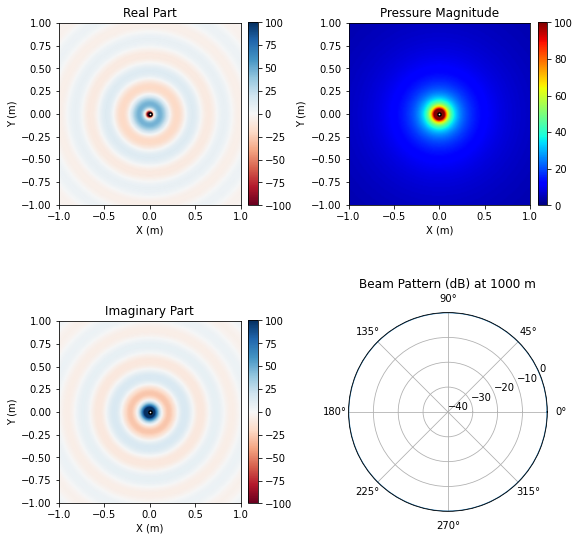

In [3]:
positions = [[0,0]]
frequencies = 1000
ap.pressure_field(positions,frequencies,
                  show_plots = True);

### Two In-Phase Sources

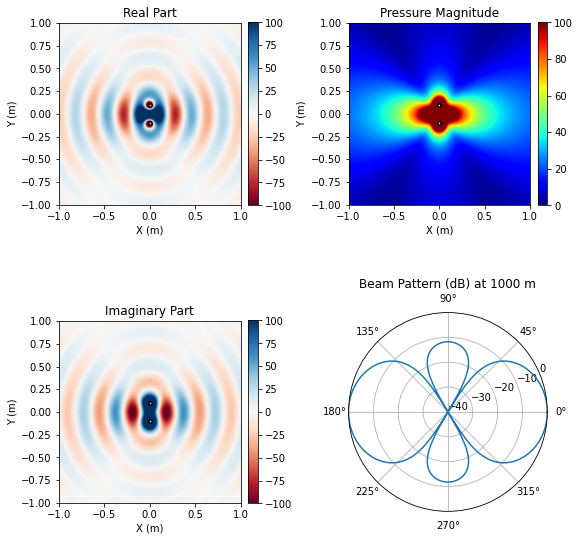

In [4]:
positions = [[0,-0.1],[0,0.1]]
frequencies = 1000
ap.pressure_field(positions,frequencies,
                  show_plots = True);

### Two Out-of-Phase Sources

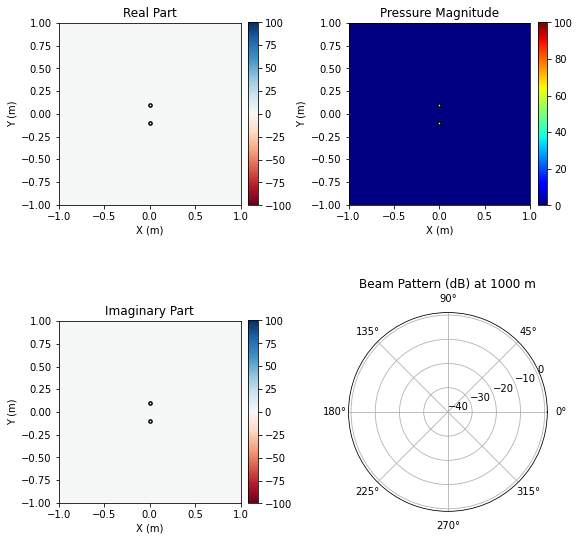

In [7]:
positions = [[0,-0.1],[0,0.1]]
frequencies = 1000
strengths = [0.01,-0.01] # Could also be accomplished with "phase"
ap.pressure_field(positions,frequencies,
                  strengths = strengths,
                  show_plots = True);

### Plotting Directivity Alone

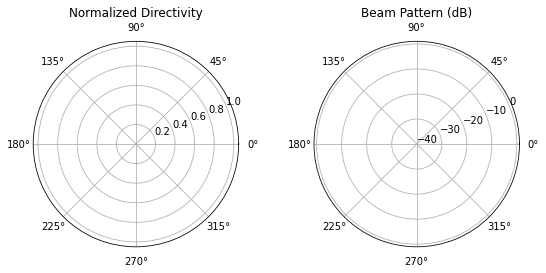

In [8]:
positions = [[0,-0.1],[0,0.1]]
frequencies = 100
strengths = [0.001,-0.001] # Could also be accomplished with "phase"
ap.pressure_field(positions,frequencies,
                  strengths = strengths,
                  show_plots = False,
                  directivity_only = True,
                  num_directivity_points = 1000,
                  directivity_plot_alone = True);

### Arbitrary Sources

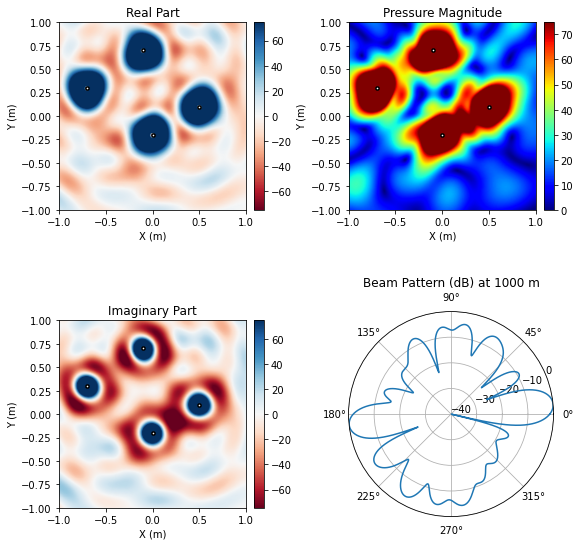

In [9]:
positions = [[0,-0.2],[0.5,0.1],[-0.7,0.3],[-0.1,0.7]]
frequencies = [1000,500,200,600]
strengths = [0.01,-0.01,0.03,-0.02]
ap.pressure_field(positions,frequencies,
                  strengths = strengths,
                  show_plots = True,
                  pressure_limits = [-75,75]);

## Baffled Circular Piston

In [11]:
import matplotlib.pyplot as plt

Total Circle Area = 0.20414 m^2, number of elements is 97


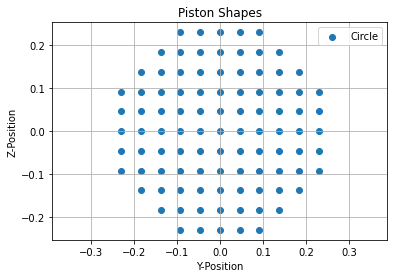

In [12]:
total_area = 0.2
num_elements = 100

# Use the get_circle_elements() function
# There's also one for squares called get_square_elements
positions_circle, areas_circle = ap.get_circle_elements(total_area,num_elements)

plt.figure()
plt.scatter(positions_circle[:,1],positions_circle[:,2],marker = "o",label = "Circle")
plt.grid()
plt.xlabel("Y-Position")
plt.ylabel("Z-Position")
plt.title("Piston Shapes")
plt.legend()
plt.axis("equal")

print("Total Circle Area = {0:.5f} m^2, number of elements is {1}".format(sum(areas_circle),len(areas_circle)))

### Three Dimensions

Source 0
Source 1
Source 2
Source 3
Source 4
Source 5
Source 6
Source 7
Source 8
Source 9
Source 10
Source 11
Source 12
Source 13
Source 14
Source 15
Source 16
Source 17
Source 18
Source 19
Source 20
Source 21
Source 22
Source 23
Source 24
Source 25
Source 26
Source 27
Source 28
Source 29
Source 30
Source 31
Source 32
Source 33
Source 34
Source 35
Source 36
Source 37
Source 38
Source 39
Source 40
Source 41
Source 42
Source 43
Source 44
Source 45
Source 46
Source 47
Source 48
Source 49
Source 50
Source 51
Source 52
Source 53
Source 54
Source 55
Source 56
Source 57
Source 58
Source 59
Source 60
Source 61
Source 62
Source 63
Source 64
Source 65
Source 66
Source 67
Source 68
Source 69
Source 70
Source 71
Source 72
Source 73
Source 74
Source 75
Source 76
Source 77
Source 78
Source 79
Source 80
Source 81
Source 82
Source 83
Source 84
Source 85
Source 86
Source 87
Source 88
Source 89
Source 90
Source 91
Source 92
Source 93
Source 94
Source 95
Source 96
Source 0
Source 1
Source 2
Source 3
Sour

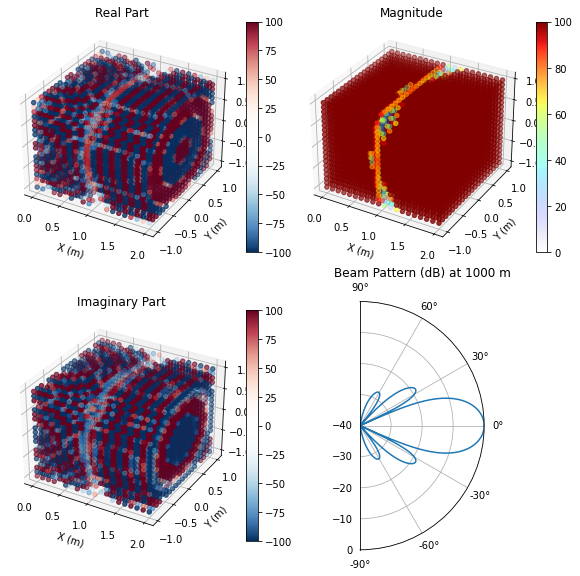

In [13]:
ap.pressure_field(positions_circle,
                  2000,
                  areas = areas_circle,
                  velocities = 0.1,
                  method = "Rayleigh",
                  x_range = [0,2],
                  point_density = 10,
                  dimensions = 3,
                  show_plots = True);

### Two Dimensions

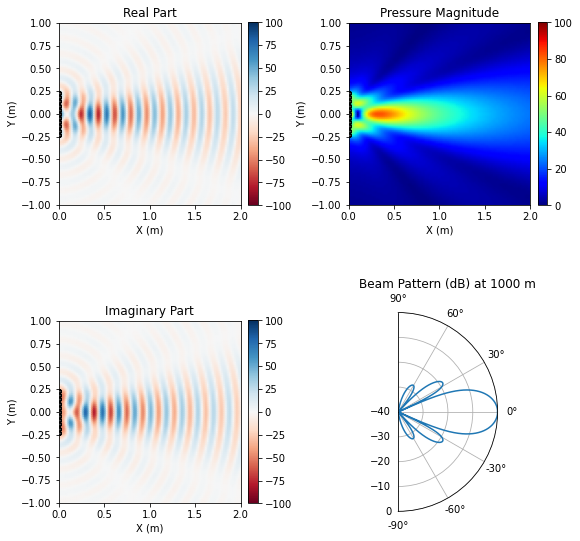

In [11]:
ap.pressure_field(positions_circle,
                  2000,
                  areas = areas_circle,
                  velocities = 0.1,
                  method = "Rayleigh",
                  x_range = [0,2],
                  point_density = 50,
                  dimensions = 2, # This is the default
                  show_plots = True);

### One Dimension

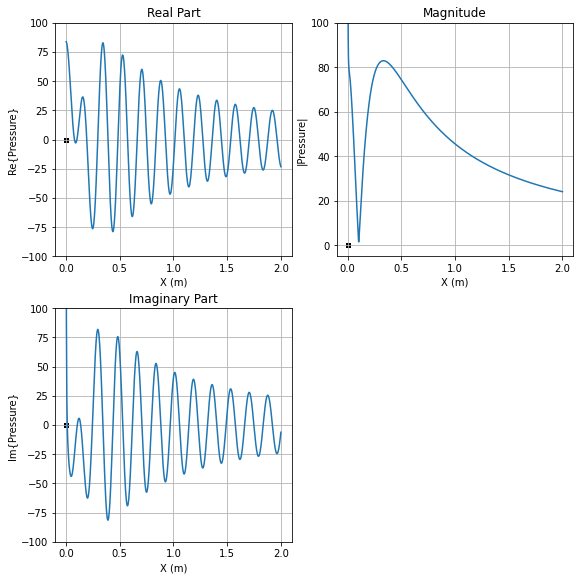

In [12]:
ap.pressure_field(positions_circle,
                  2000,
                  areas = areas_circle,
                  velocities = 0.1,
                  method = "Rayleigh",
                  x_range = [0,2],
                  point_density = 500,
                  dimensions = 1,
                  show_plots = True);